# WeatherPy

In [31]:
# Dependencies and Setup
import re, os, json, time, requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import logging and config
import logging, LOGS
from configparser import ConfigParser

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [32]:
ini_conf = 'conf/config.ini'
log_conf = 'conf/logger.conf'

# Execute config functionality
config = ConfigParser()
config.read(ini_conf)

# Execute logging functionality
LOGGER = logging.getLogger(__name__)
LOGS.init_logging(log_conf)

In [33]:
# Output File (CSV)
output_data_file = config.get('filepaths', 'weather_output')

In [34]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [35]:
LOGGER.info('Generate Cities List')

# List for holding lat_lngs and cities
lat_longs = []
cities = []

seed_size=1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=seed_size)
longs = np.random.uniform(low=-180.000, high=180.000, size=seed_size)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)

LOGGER.info('Count of cities: {}'.format(len(cities)))        

2018-08-10 04:39:11,588 [ __main__ ] ~INFO~ Generate Cities List
2018-08-10 04:39:12,740 [ __main__ ] ~INFO~ Count of cities: 625


## Perform API Calls

In [ ]:
# OpenWeatherMap Config
api_url = config.get('OpenWeatherMap', 'url')
key_value = config.get('OpenWeatherMap', 'key')
units_value = config.get('OpenWeatherMap', 'units')

# OpenWeatherMap API Call(s)
cities_weather_data = []

for city in cities:
    query_parms = {'units': units_value, 'APPID': key_value, 'q': city}
    resp = requests.get(api_url, params=query_parms)
    result = resp.json()
    
    LOGGER.info('Request status: {} for {}'.format(resp.status_code, city))
    LOGGER.info('Request URL: {}'.format(resp.url))
    
    if resp.status_code == requests.codes.ok:
        cities_weather_data.append({ "ID": result["id"],
                                     "City": result["name"],
                                     "Lat": result["coord"]["lat"],
                                     "Long": result["coord"]["lon"],
                                     "Max Temp": result["main"]["temp_max"],
                                     "Humidity": result["main"]["humidity"],
                                     "Cloudiness": result["clouds"]["all"],
                                     "Wind Speed": result["wind"]["speed"],
                                     "Country": result["sys"]["country"],
                                     "Date": result["dt"] })
    else:
        LOGGER.error('City was not found: {}'.format(city))

    # deplay for API; limit 60 calls/minute
    time.sleep(1)

In [37]:
cities_weather = pd.DataFrame(cities_weather_data).set_index(["ID"])
cities_weather.to_csv(output_data_file)
cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
ID,,,,,,,,,
4030556,Rikitea,92,PF,1533875964,99,-23.12,-134.97,74.45,15.79
3421193,Paamiut,0,GL,1533875844,95,61.99,-49.67,42.32,8.41
3874787,Punta Arenas,40,CL,1533873600,96,-53.16,-70.91,32.00,8.05
6201424,Mataura,0,NZ,1533875713,91,-46.19,168.86,43.13,2.82
104515,Mecca,8,SA,1533875968,40,21.43,39.83,92.27,4.16


***

In [40]:
cloudiness = cities_weather["Cloudiness"]
humidity = cities_weather["Humidity"]
lats = cities_weather["Lat"]
max_temps = cities_weather["Max Temp"]
wind_speed = cities_weather["Wind Speed"]

## Temperature (F) vs. Latitude

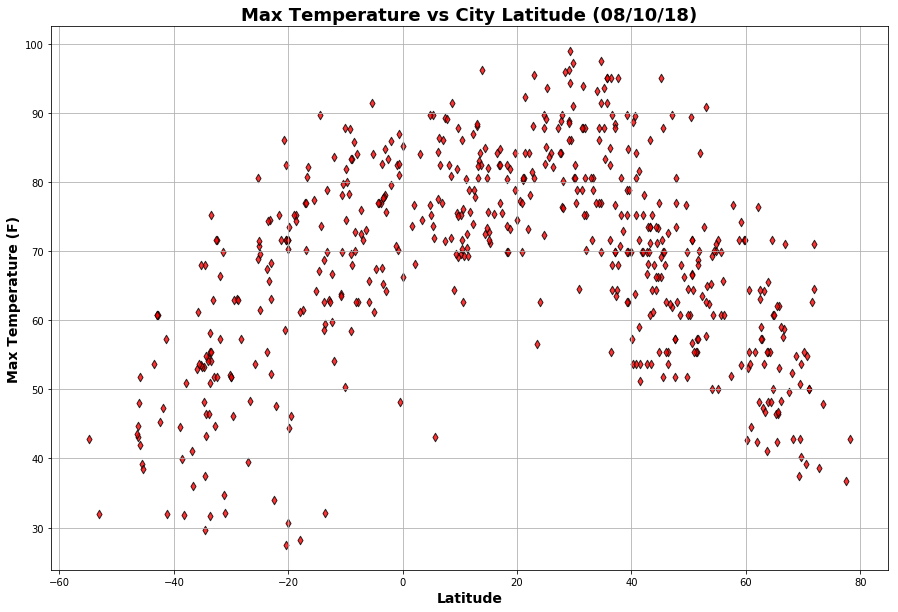

In [52]:
# Generate the Plot
plt.figure(figsize = (15,10))
plt.title("Max Temperature vs City Latitude (%s)" % time.strftime("%x"),fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Max Temperature (F)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.grid(True)

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            color="red",
            edgecolor="black",
            linewidths=1,
            marker="d",
            alpha=0.8,
            label="Cities")

plt.savefig("Resources/Temperature.Latitude.png")
plt.show()

## Humidity (%) vs. Latitude

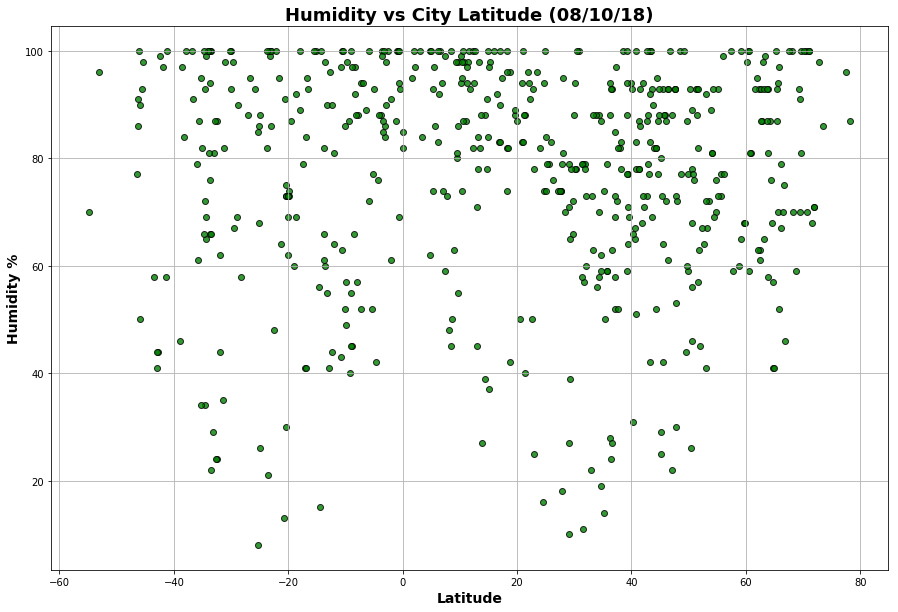

In [53]:
# Generate the Plot
plt.figure(figsize = (15,10))
plt.title("Humidity vs City Latitude (%s)" % time.strftime("%x"),fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Humidity %", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.grid(True)

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            humidity,
            color="green",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

plt.savefig("Resources/Humidity.Latitude.png")
plt.show()

## Cloudiness (%) vs. Latitude

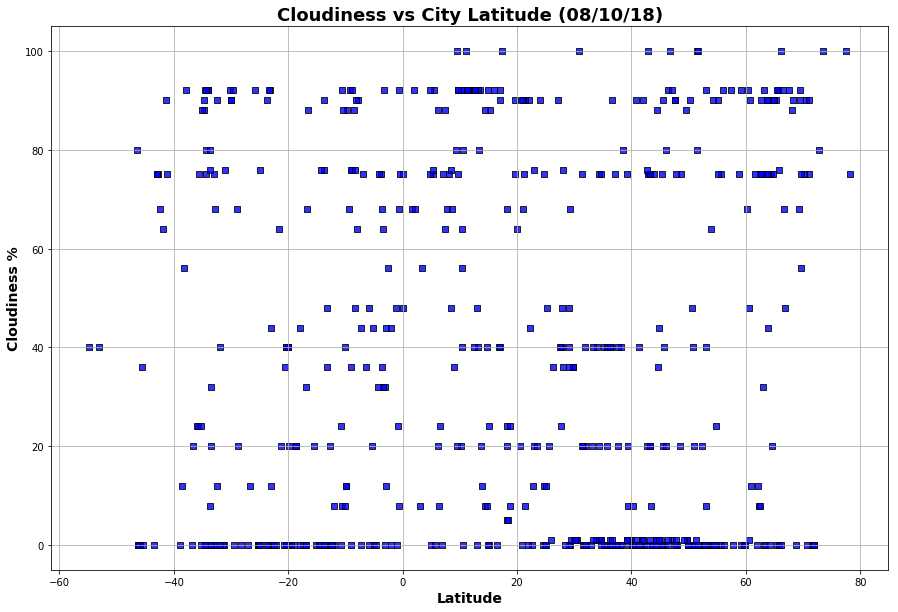

In [54]:
# Generate the Plot
plt.figure(figsize = (15,10))
plt.title("Cloudiness vs City Latitude (%s)" % time.strftime("%x"),fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Cloudiness %", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.grid(True)

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            cloudiness,
            color="blue",
            edgecolor="black",
            linewidths=1,
            marker="s",
            alpha=0.8,
            label="Cities")

plt.savefig("Resources/Cloudiness.Latitude.png")
plt.show()

## Wind Speed (mph) vs. Latitude

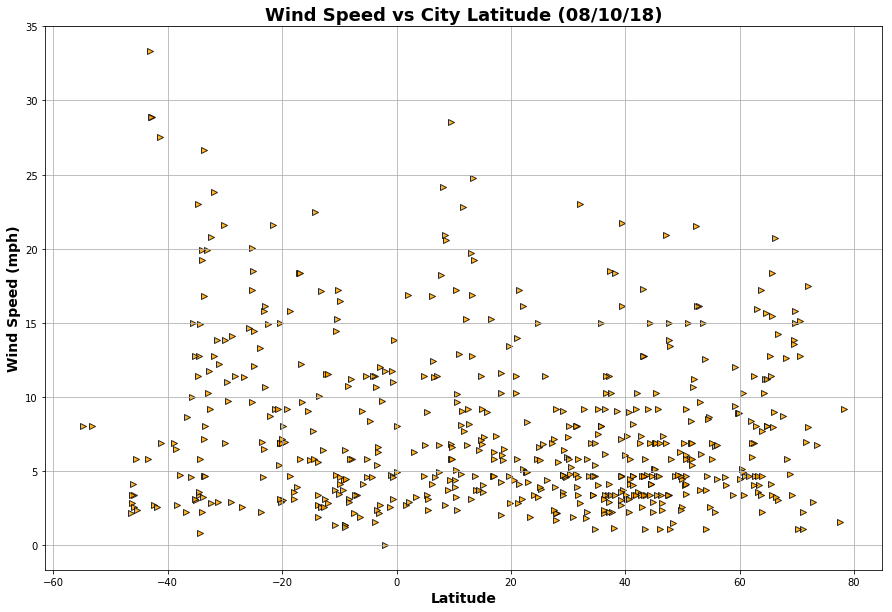

In [58]:
# Generate the Plot
plt.figure(figsize = (15,10))
plt.title("Wind Speed vs City Latitude (%s)" % time.strftime("%x"),fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Wind Speed (mph)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.grid(True)

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            wind_speed,
            color="orange",
            edgecolor="black",
            linewidths=1,
            marker=">",
            alpha=0.8,
            label="Cities")

plt.savefig("Resources/WindSpeed.Latitude.png")
plt.show()

### Observable Trends
>Wind speeds that are above 20 mph tend to occur when the temperature above 70 degrees

>Humidity does not seem to have a correlation to latitude. Several varying latitudes have humidity ranging from 40 to 100%.

>Between 20 and 40 degrees latitude is the city that is the hottest, has the most cloud cover, most humid and no wind.
